In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('HR_Dataset.csv')

In [4]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
3944,0.78,0.91,5,150,4,0,0,0,support,low
12998,0.67,0.60,5,253,6,0,0,0,sales,medium
8668,0.97,0.89,4,193,3,0,0,0,technical,low
4805,0.49,0.61,3,148,2,1,0,0,RandD,low
10596,0.20,0.97,4,237,5,0,0,0,IT,medium


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
df.rename(columns={'Departments ':'department'},inplace =True)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
df.shape


(14999, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [12]:
df.duplicated().sum()

3008

In [13]:
df.duplicated().any()

True

In [14]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(11991, 10)

In [17]:
df.duplicated().any()

False

In [18]:
df.duplicated().sum()

0

In [19]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

<AxesSubplot: >

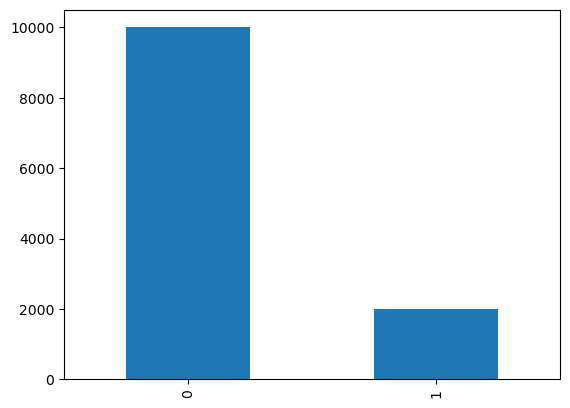

In [20]:
df['left'].value_counts().plot(kind='bar')

In [21]:
X=df.drop('left',axis=1)
y=df['left']

In [22]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high
11996,0.74,0.95,5,266,10,0,1,management,high
11997,0.85,0.54,3,185,10,0,1,management,high
11998,0.33,0.65,3,172,10,0,1,marketing,high


In [23]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
794,0.11,0.79,7,295,4,0,1,0,hr,low
1031,0.11,0.93,4,295,3,0,1,0,technical,low
8191,0.61,0.38,2,268,3,0,0,0,sales,low
4036,0.78,0.80,4,175,3,0,0,0,product_mng,medium
339,0.10,0.91,6,246,4,0,1,0,hr,medium


In [26]:
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']),
                               
                               ('nominal',OneHotEncoder(),['department']),
                               ('ordinal',OrdinalEncoder(),['salary'])                            
                                ],remainder='passthrough')

In [27]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['satisfaction_level', 'last_evaluation',
                                  'number_project', 'average_montly_hours',
                                  'time_spend_company', 'Work_accident',
                                  'promotion_last_5years']),
                                ('nominal', OneHotEncoder(), ['department']),
                                ('ordinal', OrdinalEncoder(), ['salary'])])

In [28]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
])

In [29]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['department']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [30]:
from sklearn import set_config

In [31]:
set_config(display='diagram')


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9592, 9), (2399, 9), (9592,), (2399,))

In [35]:
import numpy as np
np.array(X_train.head(1))

array([[0.98, 0.91, 4, 240, 3, 0, 0, 'technical', 'low']], dtype=object)

In [36]:
X_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
2041,0.98,0.91,4,240,3,0,0,technical,low


In [37]:
y_train.value_counts()

0    7999
1    1593
Name: left, dtype: int64

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['department']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [39]:
X_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
2041,0.98,0.91,4,240,3,0,0,technical,low


In [40]:
y_pred=pipeline.predict(X_test)

In [41]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [42]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [43]:
accuracy_score(y_test,y_pred)


0.9858274280950396

In [44]:
precision_score(y_test,y_pred)


0.989247311827957

In [45]:
recall_score(y_test,y_pred)

0.9246231155778895

In [46]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [47]:
pipeline.predict(sample)

KeyError: "None of [Index(['department'], dtype='object')] are in the [columns]"

In [ ]:
# Save the Model

In [ ]:
import pickle
with open('pipeline.pkl','wb') as f1:
    pickle.dump(pipeline,f1)

In [ ]:
with open('pipeline.pkl','rb') as f1:
    pipeline_saved=pickle.load(f1)

In [ ]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [ ]:
sample

In [ ]:
pipeline_saved.predict(sample)